
# Creating a GeoDataFrame from a DataFrame with coordinates

This example shows how to create a ``GeoDataFrame`` when starting from
a *regular* ``DataFrame`` that has coordinates either WKT
([well-known text](https://en.wikipedia.org/wiki/Well-known_text))
format, or in
two columns.


In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

From longitudes and latitudes
=============================

First, let's consider a ``DataFrame`` containing cities and their respective
longitudes and latitudes.



In [2]:
df = pd.DataFrame(
    {
        "City": ["Buenos Aires", "Brasilia", "Santiago", "Bogota", "Caracas"],
        "Country": ["Argentina", "Brazil", "Chile", "Colombia", "Venezuela"],
        "Latitude": [-34.58, -15.78, -33.45, 4.60, 10.48],
        "Longitude": [-58.66, -47.91, -70.66, -74.08, -66.86],
    }
)

A ``GeoDataFrame`` needs a ``shapely`` object. We use geopandas
``points_from_xy()`` to transform **Longitude** and **Latitude** into a list
of ``shapely.Point`` objects and set it as a ``geometry`` while creating the
``GeoDataFrame``. (note that ``points_from_xy()`` is an enhanced wrapper for
``[Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]``). The ``crs``
value is also set to explicitly state the geometry data defines latitude/
longitude world geodetic degree values. This is important for the correct 
interpretation of the data, such as when plotting with data in other formats.

In [3]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

``gdf`` looks like this :



In [4]:
print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


Finally, we plot the coordinates over a country-level map.



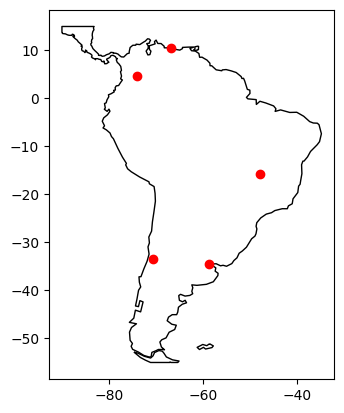

In [5]:
world = geopandas.read_file(get_path("naturalearth.land"))

# We restrict to South America.
ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red")

plt.show()

From WKT format
===============
Here, we consider a ``DataFrame`` having coordinates in WKT format.



In [6]:
df = pd.DataFrame(
    {
        "City": ["Buenos Aires", "Brasilia", "Santiago", "Bogota", "Caracas"],
        "Country": ["Argentina", "Brazil", "Chile", "Colombia", "Venezuela"],
        "Coordinates": [
            "POINT(-58.66 -34.58)",
            "POINT(-47.91 -15.78)",
            "POINT(-70.66 -33.45)",
            "POINT(-74.08 4.60)",
            "POINT(-66.86 10.48)",
        ],
    }
)

We use ``shapely.wkt`` sub-module to parse wkt format:



In [7]:
from shapely import wkt

df["Coordinates"] = geopandas.GeoSeries.from_wkt(df["Coordinates"])

The ``GeoDataFrame`` is constructed as follows :



In [8]:
gdf = geopandas.GeoDataFrame(df, geometry="Coordinates")

print(gdf.head())

           City    Country                  Coordinates
0  Buenos Aires  Argentina  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil  POINT (-47.91000 -15.78000)
2      Santiago      Chile  POINT (-70.66000 -33.45000)
3        Bogota   Colombia    POINT (-74.08000 4.60000)
4       Caracas  Venezuela   POINT (-66.86000 10.48000)


Again, we can plot our ``GeoDataFrame``.



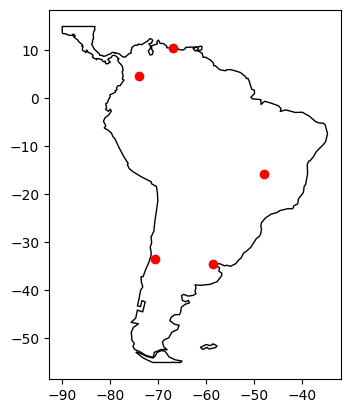

In [9]:
ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

gdf.plot(ax=ax, color="red")

plt.show()